In [2]:
pip install statsmodels

You should consider upgrading via the 'd:\quera\qenv\scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime, timedelta, time
import scipy
import pylab
import statsmodels.tsa.stattools as sts

In [66]:
df = pd.read_csv('XAUUSD.csv')

In [67]:
df.head()

,XAUUSD Historical Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Date,Open,High,Low,Close,Change(Pips),Change(%)
1,7/4/2023 0:00,1921.07,1930.22,1920.34,1929.65,858,0.44
2,7/3/2023 0:00,1917.7,1930.5,1910.11,1921.17,347,0.18
3,7/2/2023 0:00,1920.3,1920.3,1917.5,1917.7,-260,-0.14
4,6/30/2023 0:00,1908.71,1922.61,1900.57,1919.2,1049,0.55


In [68]:
df.rename(columns = {'XAUUSD Historical Data':'Date',
                             'Unnamed: 1':'Open', 'Unnamed: 2':'High', 'Unnamed: 3':'Low','Unnamed: 4':'Close', 
                              'Unnamed: 5':'Change(Pips)', 'Unnamed: 6':'Change(%)'}, inplace = True)

In [69]:
df.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,Date,Open,High,Low,Close,Change(Pips),Change(%)
1,7/4/2023 0:00,1921.07,1930.22,1920.34,1929.65,858,0.44
2,7/3/2023 0:00,1917.7,1930.5,1910.11,1921.17,347,0.18
3,7/2/2023 0:00,1920.3,1920.3,1917.5,1917.7,-260,-0.14
4,6/30/2023 0:00,1908.71,1922.61,1900.57,1919.2,1049,0.55


In [70]:
df = df.drop(df.index[0])

In [71]:
df.head(30)

,Date,Open,High,Low,Close,Change(Pips),Change(%)
1,7/4/2023 0:00,1921.07,1930.22,1920.34,1929.65,858,0.44
2,7/3/2023 0:00,1917.7,1930.5,1910.11,1921.17,347,0.18
3,7/2/2023 0:00,1920.3,1920.3,1917.5,1917.7,-260,-0.14
4,6/30/2023 0:00,1908.71,1922.61,1900.57,1919.2,1049,0.55
5,6/29/2023 0:00,1909.47,1913,1893.16,1908.76,-71,-0.04
6,6/28/2023 0:00,1915.26,1916.98,1903.46,1909.58,-568,-0.3
7,6/27/2023 0:00,1922.57,1930.04,1910.6,1915.39,-718,-0.37
8,6/26/2023 0:00,1925.22,1933.18,1920.4,1922.28,-294,-0.15
9,6/25/2023 0:00,1927.3,1927.3,1920.51,1925.29,-201,-0.1
10,6/23/2023 0:00,1914.47,1936.57,1910.2,1920.79,632,0.33


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 1 to 622
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          622 non-null    object
 1   Open          622 non-null    object
 2   High          622 non-null    object
 3   Low           622 non-null    object
 4   Close         622 non-null    object
 5   Change(Pips)  622 non-null    object
 6   Change(%)     622 non-null    object
dtypes: object(7)
memory usage: 38.9+ KB


In [73]:
df= pd.DataFrame(df)
# Convert the 'date' column to a datetime format

df['Date']=pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Change(Pips),Change(%)
1,2023-07-04,1921.07,1930.22,1920.34,1929.65,858,0.44
2,2023-07-03,1917.7,1930.5,1910.11,1921.17,347,0.18
3,2023-07-02,1920.3,1920.3,1917.5,1917.7,-260,-0.14
4,2023-06-30,1908.71,1922.61,1900.57,1919.2,1049,0.55
5,2023-06-29,1909.47,1913,1893.16,1908.76,-71,-0.04
...,...,...,...,...,...,...,...
618,2021-07-08,1803.29,1818,1793.9,1803.75,46,0.03
619,2021-07-07,1795.28,1809.5,1793.41,1803.22,794,0.44
620,2021-07-06,1790.85,1814.89,1789.89,1795.68,483,0.27
621,2021-07-05,1786.68,1794,1783.8,1791.15,447,0.25


In [74]:
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Close'] = df['Close'].astype(float)
df['Change(Pips)'] = df['Change(Pips)'].astype(float)
df['Change(%)'] = df['Change(%)'].astype(float)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 622 entries, 1 to 622
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          622 non-null    datetime64[ns]
 1   Open          622 non-null    float64       
 2   High          622 non-null    float64       
 3   Low           622 non-null    float64       
 4   Close         622 non-null    float64       
 5   Change(Pips)  622 non-null    float64       
 6   Change(%)     622 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 38.9 KB


In [77]:
df.set_index('Date',inplace=True)
df

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2023-07-04,1921.07,1930.22,1920.34,1929.65,858.0,0.44
2023-07-03,1917.70,1930.50,1910.11,1921.17,347.0,0.18
2023-07-02,1920.30,1920.30,1917.50,1917.70,-260.0,-0.14
2023-06-30,1908.71,1922.61,1900.57,1919.20,1049.0,0.55
2023-06-29,1909.47,1913.00,1893.16,1908.76,-71.0,-0.04
...,...,...,...,...,...,...
2021-07-08,1803.29,1818.00,1793.90,1803.75,46.0,0.03
2021-07-07,1795.28,1809.50,1793.41,1803.22,794.0,0.44
2021-07-06,1790.85,1814.89,1789.89,1795.68,483.0,0.27


In [64]:
df

,Date,Open,High,Low,Close,Change(Pips),Change(%),tradeDay
1,2023-07-04,1921.07,1930.22,1920.34,1929.65,858.0,0.44,4
2,2023-07-03,1917.70,1930.50,1910.11,1921.17,347.0,0.18,3
3,2023-07-02,1920.30,1920.30,1917.50,1917.70,-260.0,-0.14,2
4,2023-06-30,1908.71,1922.61,1900.57,1919.20,1049.0,0.55,30
5,2023-06-29,1909.47,1913.00,1893.16,1908.76,-71.0,-0.04,29
...,...,...,...,...,...,...,...,...
618,2021-07-08,1803.29,1818.00,1793.90,1803.75,46.0,0.03,8
619,2021-07-07,1795.28,1809.50,1793.41,1803.22,794.0,0.44,7
620,2021-07-06,1790.85,1814.89,1789.89,1795.68,483.0,0.27,6
621,2021-07-05,1786.68,1794.00,1783.80,1791.15,447.0,0.25,5


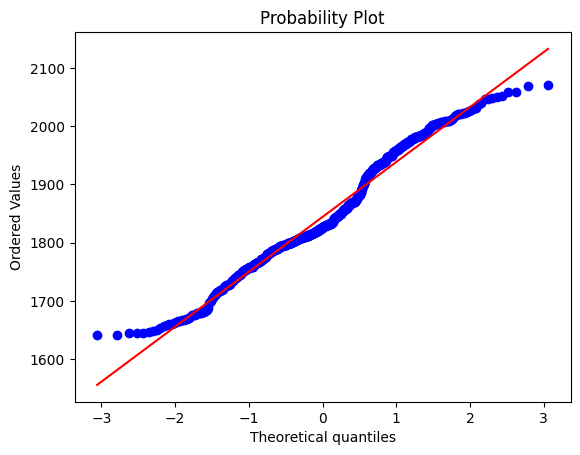

In [106]:
scipy.stats.probplot(df.High,plot=pylab)
pylab.show()

In [83]:
sts.adfuller(df.High)

(-1.883713917129698,
 0.3397609547235643,
 0,
 621,
 {'1%': -3.440924132966757,
  '5%': -2.866205413627313,
  '10%': -2.5692545786625383},
 4888.270658082003)

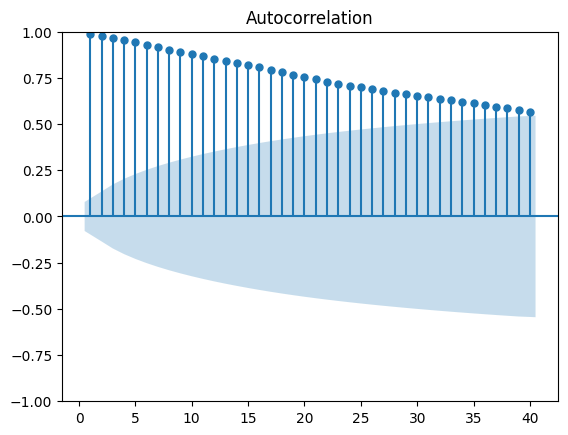

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
#acf Plot
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.High,lags=40,zero=False)
plt.show()

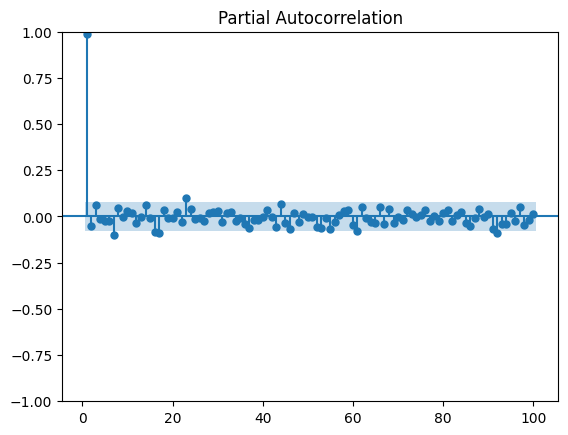

In [86]:
sgt.plot_pacf(df.High,lags=100,zero=False)
plt.show()

In [89]:
size= int(len(df)*0.85)
train_dataset= df.iloc[:size,:]
test_dataset=df.iloc[size:,:]

In [90]:
test_dataset

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-10-20,1768.68,1788.23,1766.00,1781.50,1282.0,0.72
2021-10-19,1763.78,1784.83,1762.90,1768.56,478.0,0.27
2021-10-18,1770.83,1771.99,1759.91,1763.78,-705.0,-0.40
2021-10-17,1767.37,1771.93,1764.60,1771.10,373.0,0.21
2021-10-15,1795.18,1796.40,1764.73,1767.28,-2790.0,-1.58
...,...,...,...,...,...,...
2021-07-08,1803.29,1818.00,1793.90,1803.75,46.0,0.03
2021-07-07,1795.28,1809.50,1793.41,1803.22,794.0,0.44
2021-07-06,1790.85,1814.89,1789.89,1795.68,483.0,0.27


In [91]:
train_dataset

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2023-07-04,1921.07,1930.22,1920.34,1929.65,858.0,0.44
2023-07-03,1917.70,1930.50,1910.11,1921.17,347.0,0.18
2023-07-02,1920.30,1920.30,1917.50,1917.70,-260.0,-0.14
2023-06-30,1908.71,1922.61,1900.57,1919.20,1049.0,0.55
2023-06-29,1909.47,1913.00,1893.16,1908.76,-71.0,-0.04
...,...,...,...,...,...,...
2021-10-26,1807.93,1808.01,1781.35,1793.40,-1453.0,-0.81
2021-10-25,1794.43,1809.87,1792.23,1807.71,1328.0,0.73
2021-10-24,1792.78,1794.43,1791.90,1794.26,148.0,0.08


In [93]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train.High,order=(2,1,2))

d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

In [94]:
result= model.fit()
result.summary()
#-7252.113

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                  528
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2145.294
Date:                Tue, 11 Jul 2023   AIC                           4300.589
Time:                        13:07:10   BIC                           4321.925
Sample:                             0   HQIC                          4308.942
                                - 528                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4194      2.162      0.194      0.846      -3.817       4.656
ar.L2          0.3497      0.785      0.446      0.656      -1.188       1.888
ma.L1         -0.3618      2.160     -0.168      0.867      -4.595       3.871
ma.L2         -0.3915      0.874     -0.448      0.654      -2.105       1.322
sigma2       201.0737      8.270     24.314      0.000     184.865     217.283
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               190.33
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.28   Skew:                            -0.29
Prob(H) (two-sided):                  0.10   Kurtosis:                         5.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

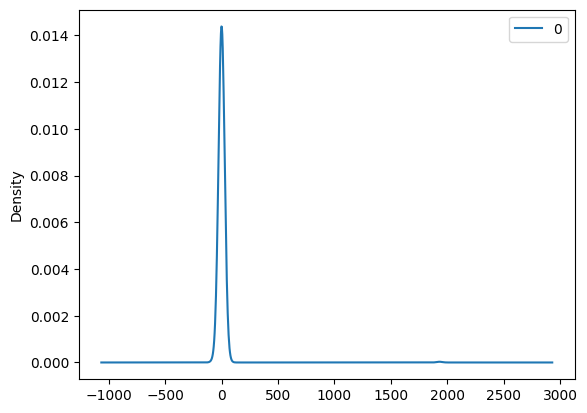

In [95]:
resid= result.resid
re= pd.DataFrame(resid)
re.plot(kind='kde')
plt.show()

In [98]:
# Predict the values for the test data
start = test.index[0]
end = test.index[-1]
history = [x for x in train.High]
n_steps = 9
pred = []

for t in range(len(test.High[start:end])):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 2))
    result = model.fit()

    # Predict the next n_steps values
    forecast = result.forecast(steps=n_steps)[0]
    #yhat=forecast[0]
    pred.append(forecast)

    # Update the history with the observed values
    obs = test.High[t]
    history.append(obs)

d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

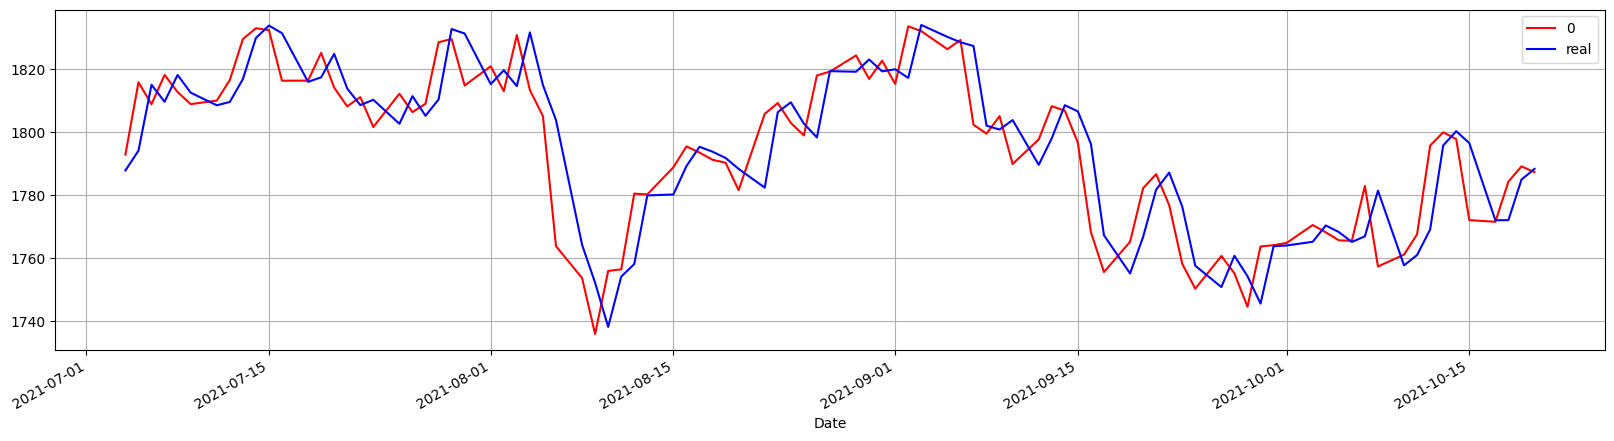

In [100]:
pred= pd.DataFrame(pred,index=test[start:end].index)
pred.plot(figsize=(20,5),c='r',label='predict')
test.High[start:end].plot(figsize=(20,5),c='b',label='real')
plt.grid()
plt.legend()

In [102]:
input_samples =test.High[-1:]

input_samples

Date
2021-07-04    1787.73
Name: High, dtype: float64

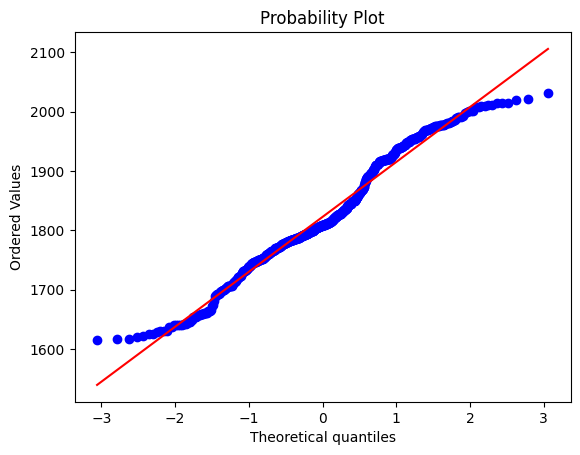

In [107]:
scipy.stats.probplot(df.Low,plot=pylab)
pylab.show()

In [108]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train.Low,order=(2,1,2))

d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

In [109]:
sts.adfuller(df.Low)

(-2.1450230831266204,
 0.22679998578372956,
 7,
 614,
 {'1%': -3.4410451945636207,
  '5%': -2.8662587328558566,
  '10%': -2.569282988466721},
 4937.750887251316)

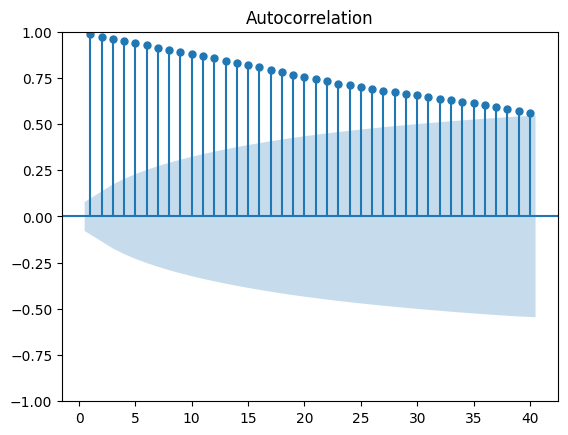

In [113]:
from statsmodels.tsa.seasonal import seasonal_decompose
#acf Plot
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.Low,lags=40,zero=False)
plt.show()

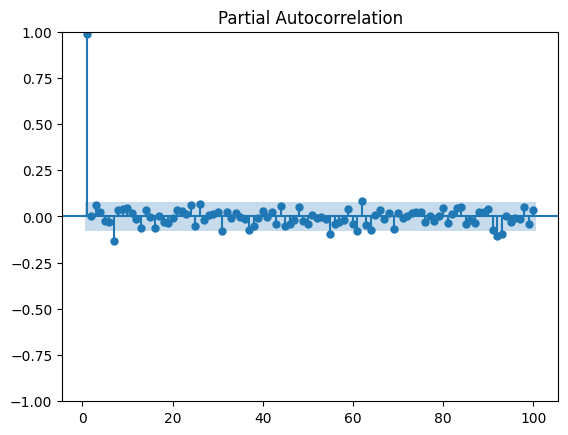

In [112]:
sgt.plot_pacf(df.Low,lags=100,zero=False)
plt.show()

In [114]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train.Low,order=(2,1,2))

d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

In [115]:
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                  528
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2140.364
Date:                Tue, 11 Jul 2023   AIC                           4290.727
Time:                        14:12:39   BIC                           4312.063
Sample:                             0   HQIC                          4299.081
                                - 528                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0025      0.025     40.130      0.000       0.954       1.051
ar.L2         -0.9557      0.024    -39.654      0.000      -1.003      -0.908
ma.L1         -1.0455      0.029    -35.509      0.000      -1.103      -0.988
ma.L2          0.9470      0.028     33.408      0.000       0.891       1.003
sigma2       197.1230      9.034     21.820      0.000     179.416     214.830
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                60.72
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                             0.04
Prob(H) (two-sided):                  0.60   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

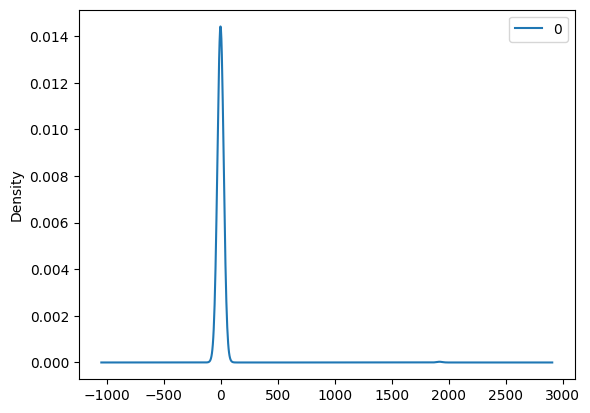

In [116]:
resid= result.resid
re= pd.DataFrame(resid)
re.plot(kind='kde')
plt.show()

In [117]:
# Predict the values for the test data
start = test.index[0]
end = test.index[-1]
history = [x for x in train.Low]
n_steps = 9
pred = []

for t in range(len(test.Low[start:end])):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 2))
    result = model.fit()

    # Predict the next n_steps values
    forecast = result.forecast(steps=n_steps)[0]
    #yhat=forecast[0]
    pred.append(forecast)

    # Update the history with the observed values
    obs = test.Low[t]
    history.append(obs)

d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

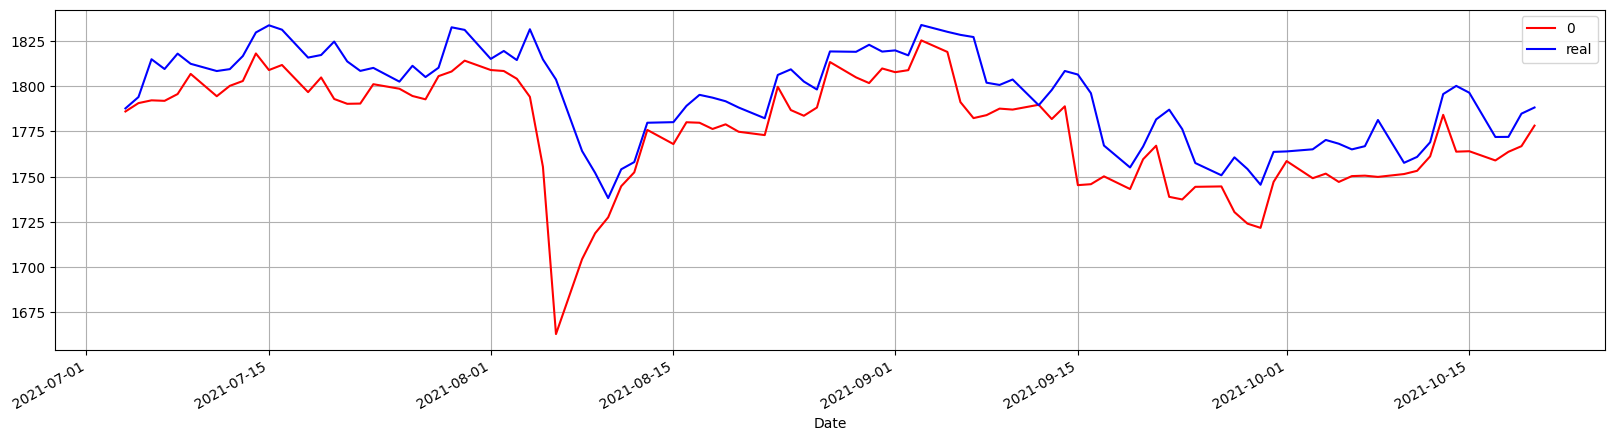

In [118]:
pred= pd.DataFrame(pred,index=test[start:end].index)
pred.plot(figsize=(20,5),c='r',label='predict')
test.High[start:end].plot(figsize=(20,5),c='b',label='real')
plt.grid()
plt.legend()

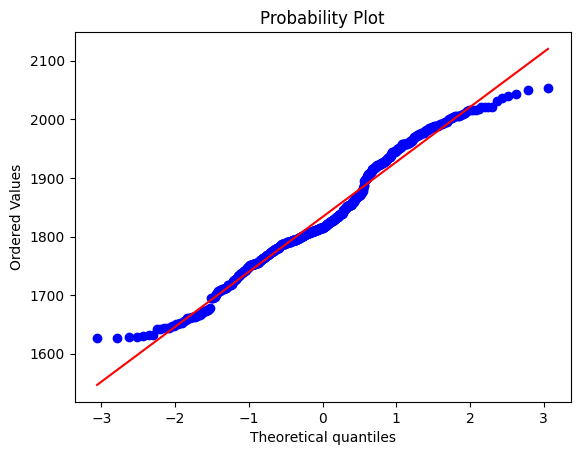

In [119]:
scipy.stats.probplot(df.Open,plot=pylab)
pylab.show()

In [120]:
sts.adfuller(df.Open)

(-2.0352263773899217,
 0.2713442664120798,
 0,
 621,
 {'1%': -3.440924132966757,
  '5%': -2.866205413627313,
  '10%': -2.5692545786625383},
 4962.986710306834)

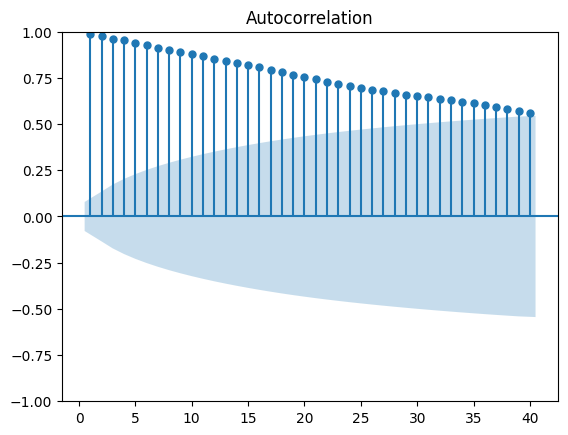

In [121]:
from statsmodels.tsa.seasonal import seasonal_decompose
#acf Plot
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df.Open,lags=40,zero=False)
plt.show()

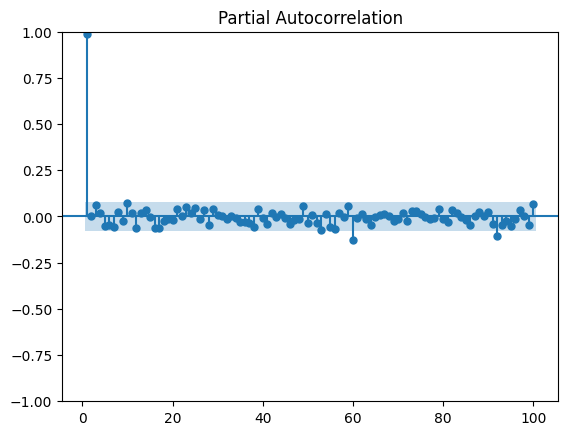

In [122]:
sgt.plot_pacf(df.Open,lags=100,zero=False)
plt.show()

In [123]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train.Open,order=(2,1,2))

d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

In [124]:
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                  528
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2174.062
Date:                Tue, 11 Jul 2023   AIC                           4358.124
Time:                        14:17:07   BIC                           4379.460
Sample:                             0   HQIC                          4366.477
                                - 528                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8285      0.112      7.394      0.000       0.609       1.048
ar.L2         -0.8553      0.084    -10.183      0.000      -1.020      -0.691
ma.L1         -0.8721      0.122     -7.126      0.000      -1.112      -0.632
ma.L2          0.8309      0.097      8.535      0.000       0.640       1.022
sigma2       224.2291     11.035     20.320      0.000     202.601     245.857
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                40.23
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.06
Prob(H) (two-sided):                  0.48   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

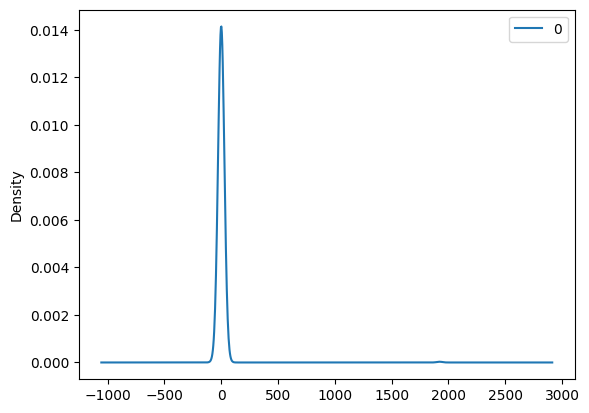

In [125]:
resid= result.resid
re= pd.DataFrame(resid)
re.plot(kind='kde')
plt.show()

In [126]:
# Predict the values for the test data
start = test.index[0]
end = test.index[-1]
history = [x for x in train.Open]
n_steps = 9
pred = []

for t in range(len(test.Open[start:end])):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 2))
    result = model.fit()

    # Predict the next n_steps values
    forecast = result.forecast(steps=n_steps)[0]
    #yhat=forecast[0]
    pred.append(forecast)

    # Update the history with the observed values
    obs = test.Open[t]
    history.append(obs)

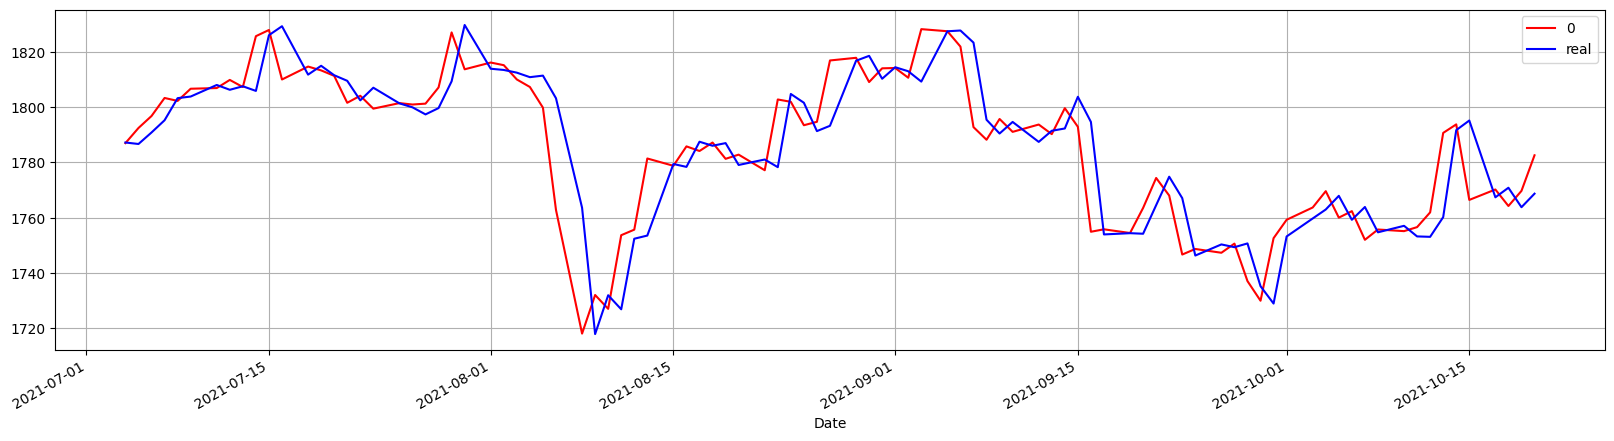

In [127]:
pred= pd.DataFrame(pred,index=test[start:end].index)
pred.plot(figsize=(20,5),c='r',label='predict')
test.Open[start:end].plot(figsize=(20,5),c='b',label='real')
plt.grid()
plt.legend()

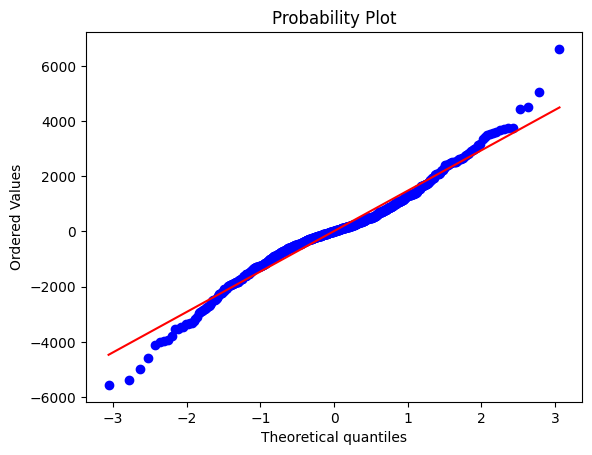

In [129]:
scipy.stats.probplot(df['Change(Pips)'],plot=pylab)
pylab.show()

In [130]:
sts.adfuller(df['Change(Pips)'])

(-18.99382128695715,
 0.0,
 1,
 620,
 {'1%': -3.440941259411399,
  '5%': -2.8662129567654664,
  '10%': -2.5692585978147764},
 10512.371090251549)

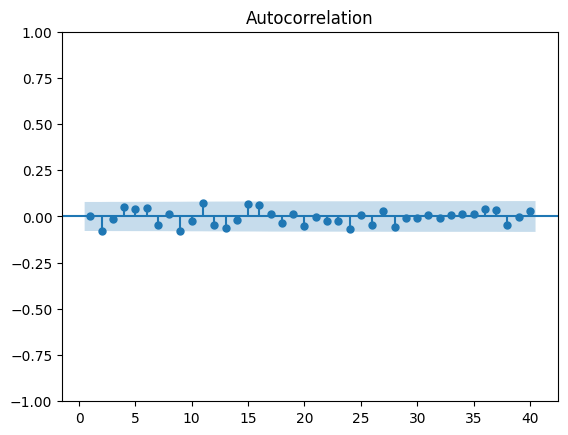

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
#acf Plot
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df['Change(Pips)'],lags=40,zero=False)
plt.show()

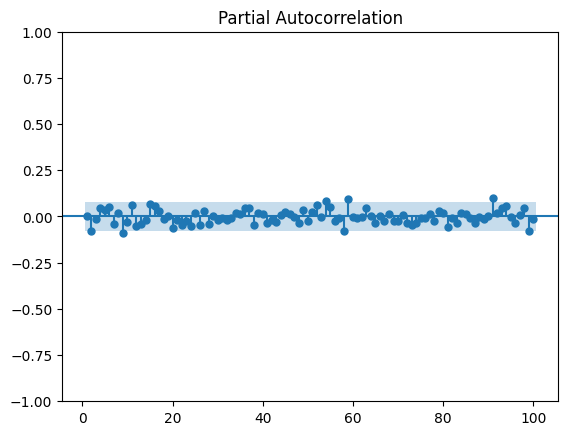

In [134]:
sgt.plot_pacf(df['Change(Pips)'],lags=100,zero=False)
plt.show()

In [135]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train_dataset['Change(Pips)'],order=(2,1,2))

d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

In [136]:
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Change(Pips)   No. Observations:                  528
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4605.146
Date:                Tue, 11 Jul 2023   AIC                           9220.292
Time:                        14:24:22   BIC                           9241.628
Sample:                             0   HQIC                          9228.645
                                - 528                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9957      0.041    -24.117      0.000      -1.077      -0.915
ar.L2         -0.0270      0.042     -0.637      0.524      -0.110       0.056
ma.L1          0.0002      0.383      0.000      1.000      -0.751       0.751
ma.L2         -0.9998      0.048    -21.030      0.000      -1.093      -0.907
sigma2      2.245e+06    1.7e-07   1.32e+13      0.000    2.24e+06    2.24e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                52.10
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.05
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.23e+28. Standard errors may be unstable.
"""

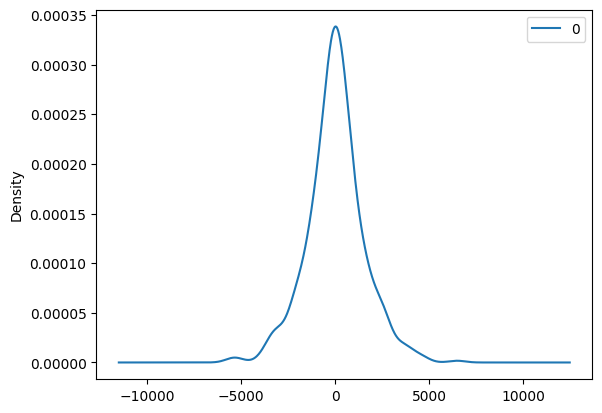

In [137]:
resid= result.resid
re= pd.DataFrame(resid)
re.plot(kind='kde')
plt.show()

In [142]:
start = test.index[0]
end = test.index[-1]
history = [x for x in train['Change(Pips)']]
n_steps = 9
pred = []

for t in range(len(test['Change(Pips)'][start:end])):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 2))
    result = model.fit()

    # Predict the next n_steps values
    forecast = result.forecast(steps=n_steps)[0]
    #yhat=forecast[0]
    pred.append(forecast)

    # Update the history with the observed values
    obs = test['Change(Pips)'][t]
    history.append(obs)

d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


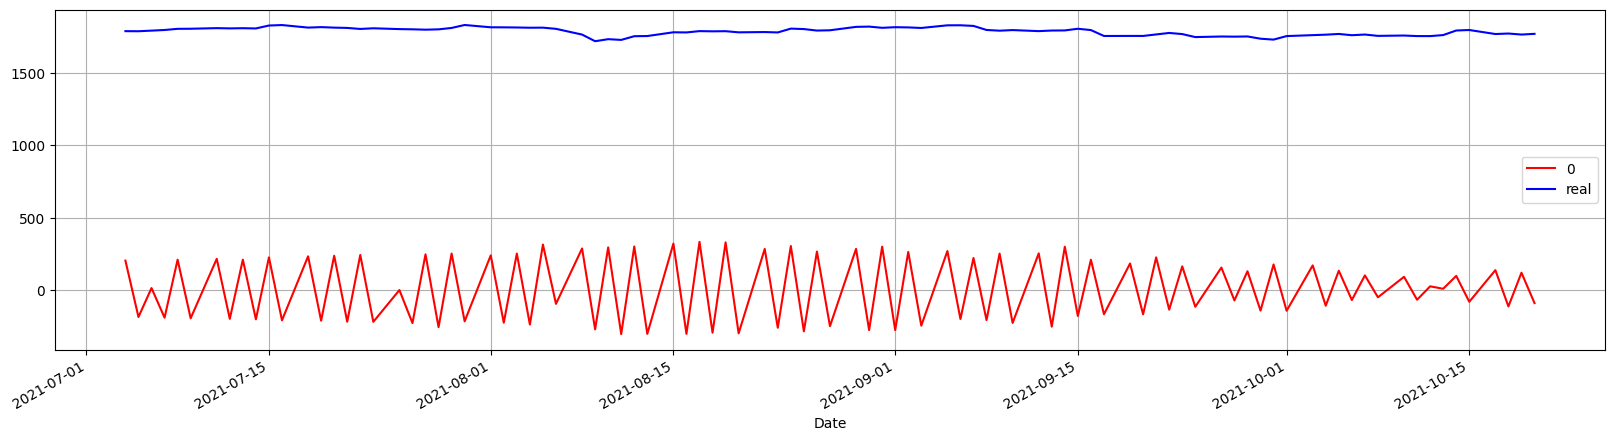

In [143]:
pred= pd.DataFrame(pred,index=test[start:end].index)
pred.plot(figsize=(20,5),c='r',label='predict')
test.Open[start:end].plot(figsize=(20,5),c='b',label='real')
plt.grid()
plt.legend()

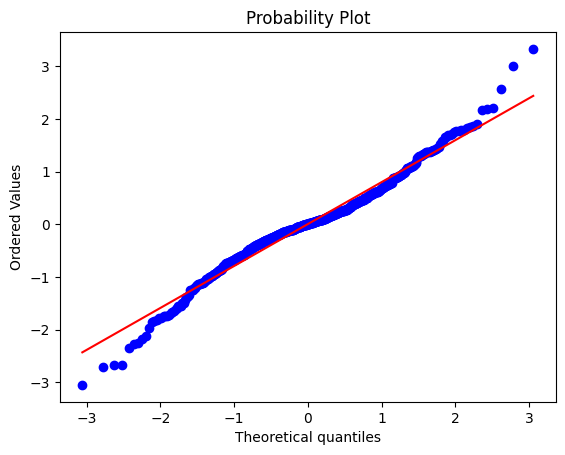

In [144]:
scipy.stats.probplot(df['Change(%)'],plot=pylab)
pylab.show()

In [145]:
sts.adfuller(df['Change(%)'])

(-18.967809732464147,
 0.0,
 1,
 620,
 {'1%': -3.440941259411399,
  '5%': -2.8662129567654664,
  '10%': -2.5692585978147764},
 1461.5026770626291)

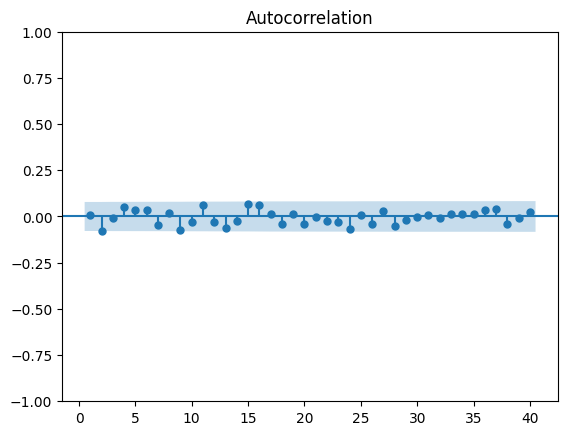

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose
#acf Plot
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(df['Change(%)'],lags=40,zero=False)
plt.show()

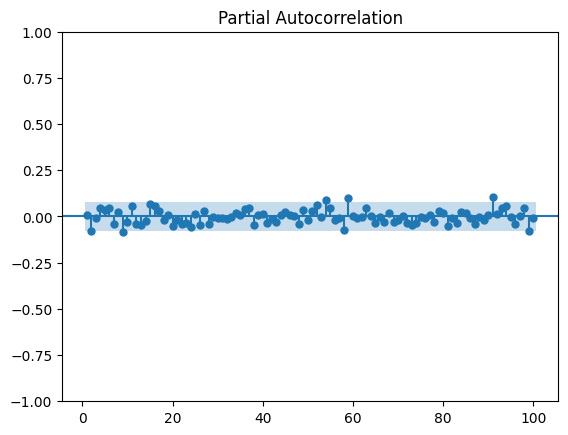

In [147]:
sgt.plot_pacf(df['Change(%)'],lags=100,zero=False)
plt.show()

In [148]:
import statsmodels.api as sm
model=sm.tsa.arima.ARIMA(train_dataset['Change(%)'],order=(2,1,2))

d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\quera\qenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWa

In [149]:
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Change(%)   No. Observations:                  528
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -640.868
Date:                Tue, 11 Jul 2023   AIC                           1291.735
Time:                        14:41:05   BIC                           1313.071
Sample:                             0   HQIC                          1300.089
                                - 528                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9886      0.045    -21.975      0.000      -1.077      -0.900
ar.L2         -0.0238      0.044     -0.538      0.591      -0.111       0.063
ma.L1         -0.0046      2.823     -0.002      0.999      -5.538       5.529
ma.L2         -0.9954      2.808     -0.354      0.723      -6.499       4.509
sigma2         0.6574      1.850      0.355      0.722      -2.968       4.283
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.22
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.02
Prob(H) (two-sided):                  0.51   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

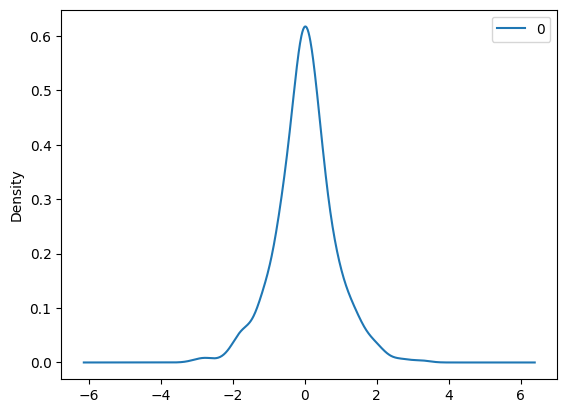

In [150]:
resid= result.resid
re= pd.DataFrame(resid)
re.plot(kind='kde')
plt.show()

In [151]:
start = test.index[0]
end = test.index[-1]
history = [x for x in train['Change(%)']]
n_steps = 9
pred = []

for t in range(len(test['Change(%)'][start:end])):
    model = sm.tsa.arima.ARIMA(history, order=(2, 1, 2))
    result = model.fit()

    # Predict the next n_steps values
    forecast = result.forecast(steps=n_steps)[0]
    #yhat=forecast[0]
    pred.append(forecast)

    # Update the history with the observed values
    obs = test['Change(%)'][t]
    history.append(obs)

d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\quera\qenv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle

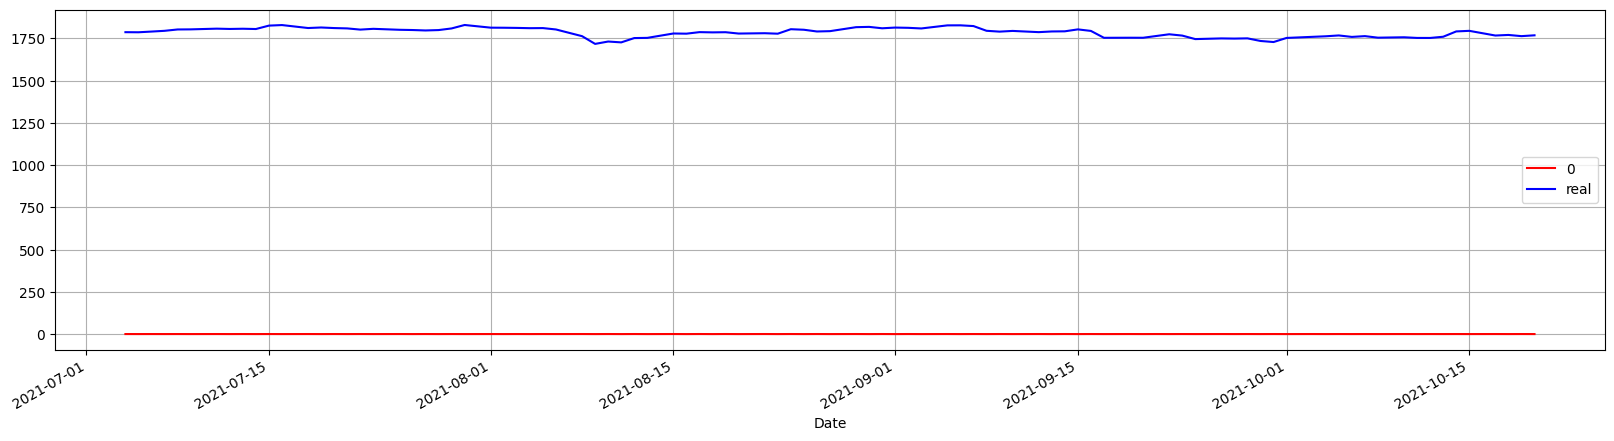

In [152]:
pred= pd.DataFrame(pred,index=test[start:end].index)
pred.plot(figsize=(20,5),c='r',label='predict')
test.Open[start:end].plot(figsize=(20,5),c='b',label='real')
plt.grid()
plt.legend()

In [165]:
def evaluate_arima_model(X, arima_order):
    size = int(len(df)*0.85)
    train = df.iloc[:size,:]
    test = df.iloc[size:,:]
    history = [x for x in train['Open']]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = r2_score(test, predictions)
    return error

In [177]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                mse = evaluate_arima_model(dataset, order)
                score, cfg = mse, order
                print(order,mse)


In [179]:
import warnings
warnings.filterwarnings("ignore")
# evaluate parameters
p_values = [1, 2, 4, 6, 8, 10]
d_values = range(1, 3)
q_values = range(1, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.High, p_values, d_values, q_values)

KeyError: 0

In [ ]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
# evaluate parameters
p_values = [ 1, 2, 4, 6, 8, 10]
d_values = range(1, 3)
q_values = range(1, 3)
warnings.filterwarnings("ignore")
evaluate_models(train.High, p_values, d_values, q_values)